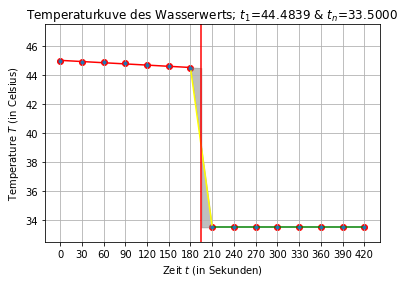

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats 
y=np.array([45,44.9,44.9,44.8,44.7,44.6,44.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5])
err=np.full(15,0.1)
#scipy.stats.linregress
x=np.arange(start=0,stop=30*14+1,step=30)
plt.scatter(x,y,color="red")
plt.errorbar(x,y,yerr=err,fmt=".")
def line(x,m,b):
    return m*x+b

reg1= stats.linregress(x[0:7], y[0:7])
reg2= stats.linregress(x[6:8], y[6:8])
reg3= stats.linregress(x[7:], y[7:])

def area(t):
    x1=abs((reg1[1]-reg2[1]) / (reg1[0]-reg2[0]))
    x2=t
    x3=t
    y1=line(x1,reg1[0],reg1[1])
    y2=line(t,reg1[0],reg1[1])
    y3=line(t,reg2[0],reg2[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area1 = abs(np.sum(c))/2
    x1=abs((reg3[1]-reg2[1]) / (reg3[0]-reg2[0]))
    x2=t
    x3=t
    y1=line(x1,reg3[0],reg3[1])
    y2=line(t,reg3[0],reg3[1])
    y3=line(t,reg2[0],reg2[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area2 = abs(np.sum(c))/2
    return abs(area1-area2)

res = optimize.minimize_scalar(area)
bestt=res.x
t1="{:.4f}".format(line(bestt,reg1[0],reg1[1]))
tn="{:.4f}".format(line(bestt,reg3[0],reg3[1]))

plt.plot(x[0:7],line(x[0:7],reg1[0],reg1[1]),color="red",)
plt.plot(x[6:8],line(x[6:8],reg2[0],reg2[1]),color="yellow")
plt.plot(x[7:],line(x[7:],reg3[0],reg3[1]),color="green")
plt.ylabel(r'Temperature $T$ (in Celsius)')
plt.xlabel(r'Zeit $t$ (in Sekunden)')
plt.plot
plt.xticks(x)
plt.ylim(bottom=32.5,top=47.5)
plt.grid()
plt.title(f"Temperaturkuve des Wasserwerts; $t_1$={t1} & $t_n$={tn}")
plt.axvline(x=bestt,color="red")
#plt.plot(x,line(x,params[0],params[1]),color="green")


low= abs((reg1[1]-reg2[1]) / (reg1[0]-reg2[0]))
high= abs((reg3[1]-reg2[1]) / (reg3[0]-reg2[0]))
x = np.arange(low,bestt,1)

y1 =x*reg1[0]+reg1[1]
y2 =x*reg2[0]+reg2[1]
y3 =x*reg3[0]+reg3[1]

plt.fill_between(x,y1,y2,color='grey',alpha='0.5')

x = np.arange(bestt,high,1)

y1 =x*reg1[0]+reg1[1]
y2 =x*reg2[0]+reg2[1]
y3 =x*reg3[0]+reg3[1]


plt.fill_between(x,y2,y3,color='grey',alpha='0.5')

plt.savefig("wasserwert.png")
